## **Heart Failure Analysis, Visualization and Prediction**

In [ ]:
# Importing the required libraries 
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff 


In [ ]:
# Loading the dataset
drive.mount('/content/drive')
path = 'drive/MyDrive/NEW/health.csv'
health = pd.read_csv(path)

#changing the column location to get the target variable - "Event" at last
health = health.loc[:,['TIME','Gender','Smoking','Diabetes','BP','Anaemia','Age','Ejection.Fraction','Sodium','Creatinine','Platelets','CPK', 'Event']] 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# View of the dataset

health.head()

,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Platelets,CPK,Event
0,97,0,0,0,0,1,43.0,50,135,1.30,237000.00,358,0
1,180,1,1,1,0,1,73.0,30,142,1.18,160000.00,231,0
2,31,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,1
3,87,1,0,0,0,1,65.0,25,141,1.10,298000.00,305,0
4,113,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610,0


In [ ]:
# Checking the datatype of each feature
health.dtypes

TIME                   int64
Gender                 int64
Smoking                int64
Diabetes               int64
BP                     int64
Anaemia                int64
Age                  float64
Ejection.Fraction      int64
Sodium                 int64
Creatinine           float64
Platelets            float64
CPK                    int64
Event                  int64
dtype: object

In [ ]:
#changing the datatype of categorical variables to categorical
for col in ['Anaemia','BP','Diabetes','Gender','Smoking','Event']:
    health[col] = health[col].astype('category')


In [ ]:
# Checking if there is any null value

health.isnull().sum()

TIME                 0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Platelets            0
CPK                  0
Event                0
dtype: int64

In [ ]:
# Getting the basic statistics of each column of the dataset

health.describe().T

,count,mean,std,min,25%,50%,75%,max
TIME,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Ejection.Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
Sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
CPK,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0


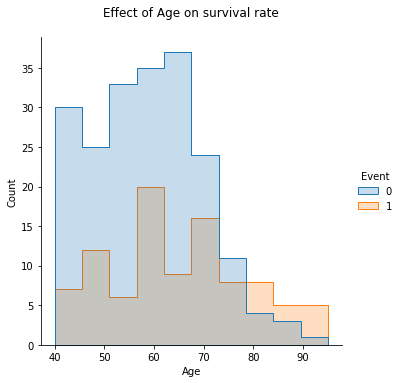

In [ ]:
# First intuition : Age, Smoking

hist_data = health["Event"]
sns.displot(health, x="Age", hue=hist_data, element="step").set(title='Effect of Age on survival rate\n')


**Insights**

1.  The rate of survival for a person of age group 50-70 is the maximum.
2.  In the 40's death count is much less.
3.  Above 70 the survival count is less. 

In [ ]:
# Effect of smoking on survival rate 
smoking_yes = health[health['Smoking']==1]
smoking_no = health[health['Smoking']==0]

smoking_yes_survived = smoking_yes[smoking_yes["Event"] == 0]
smoking_yes_not_survived = smoking_yes[smoking_yes["Event"] == 1]
smoking_no_survived = smoking_no[smoking_no["Event"] == 0]
smoking_no_not_survived = smoking_no[smoking_no["Event"] == 1]

labels = ['Smoking YES - Survived','Smoking  YES - Not Survived', 'Smoking NO - Survived',
           'Smoking  NO - Not Survived']

values = [len(smoking_yes_survived), len(smoking_yes_not_survived),
          len(smoking_no_survived), len(smoking_no_not_survived)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0.1])])
fig.update_layout(title_text="Effect of smoking on survival rate.")  
fig.show()


**Visualizing the data distribution for each categorical variable**

Visualizing the data distribution for each categorical variable


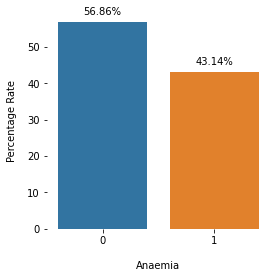

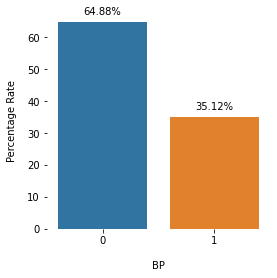

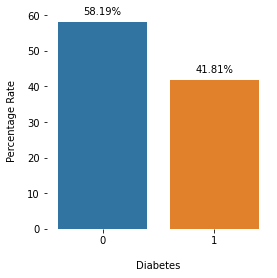

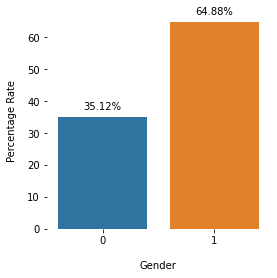

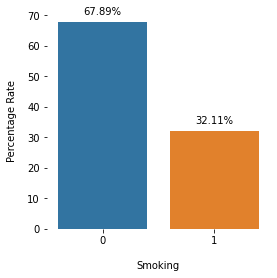

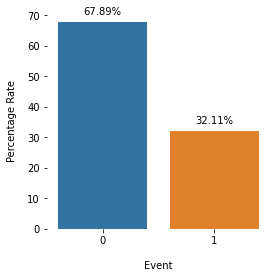

In [ ]:
print("Visualizing the data distribution for each categorical variable")

categoryy_list = [['Anaemia'],['BP'],['Diabetes'],['Gender'],['Smoking'],['Event']]

for i in categoryy_list:
  plt.figure(figsize = (4, 4))
          
  for col_list in i:
      # Getting the percent valye of each label
      series = round(((health[col_list].value_counts(dropna = False))/
                      (len(health[col_list])) * 100), 2)
      

      # Creating a bar plot
      plt.plot(2, 3)
      ax = sns.barplot(x = series.index, y = series.values)
      sns.despine(bottom = True, left = True)
      plt.xlabel(col_list, labelpad = 15)
      plt.ylabel('Percentage Rate', labelpad = 10)

      ax.grid(False)
      
      
      for rect in ax.patches:
              # Get X and Y placement of label from rect.
              y_value = rect.get_height()
              x_value = rect.get_x() + rect.get_width() / 2
              # Use Y value as label and format number with one decimal place
              label = "{:.2f}%".format(y_value)

              # Create annotation
              plt.annotate(
                  label,                        # Use `label` as label
                  (x_value, y_value),           # Place label at end of the bar
                  xytext = (0, 5),          # Vertically shift label by `space`
                  textcoords = "offset points", # Interpret `xytext` as offset in points
                  ha = 'center',                # Horizontally center label
                  va = 'bottom')                      # Vertically align label differently for positive and negative values.
              
  plt.subplots_adjust(hspace = 0.3)
  plt.subplots_adjust(wspace = 0.5)
  plt.show()                    



**Following are the insights from the above visualization**

1. Out of the total patients 57% of the population have aneamic symptoms while the rest 43% are non-aneamic.

2. 65% of the population have hypertension or high blood pressure while ~35% have normal blood pressure.

3. 58% of the population are diabetic while ~42% are non-diabetic.

4. 65% of the population are male while ~35% are female.

5. 68% of the population have smoking habits while ~32% are non-smokers.

6. Overall, the dataset has 68% of the survival cases and 32% of death cases.   

**Effect of different variables on death event**

**Gender Vs Death Event**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Male - female distribution 
male = health[health["Gender"] == 1]
female = health[health["Gender"] == 0]

male_survived = male[health["Event"] == 0]
male_not_survived = male[health["Event"] == 1]
female_survived = female[health["Event"] == 0]
female_not_urvived = female[health["Event"] == 1]
labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not_survived), len(female_survived),len(female_not_urvived)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0.1])])
fig.update_layout(title_text="Survival rate w.r.t gender.")
      
# show the interactive view
fig.show()
      


 The ratio of death and survival for both Male and Female stays same.


**Creatinine Serum Level Vs Death Event**

In [ ]:
print("Elevated Serum Levels and Death Cases")
print("-------------------------------------------------------------")

# Total number of death cases and the levels of serum creatinine in such cases
death_events = health[health["Event"] == 1]
print("Total number of death cases reported due to heart failure:", death_events.shape[0])

# Higher levels of serum - the upper limit is chosen as 1.1 as per the study on the topic.
high_serum_level_deaths = death_events[death_events["Creatinine"] >= 1]
print("Total number of death cases with much higher serum levels:", high_serum_level_deaths.shape[0])

print("\nElevated Serum Levels and Survival Cases")
print("-------------------------------------------------------------")

# Total number of survival cases and the levels of serum creatinine in such cases
survivals = health[health["Event"] == 0]
print("Total number of survivals after a heart failure condition:", survivals.shape[0])

# Higher levels of serum - the upper limit is chosen as 1.1 as per the study on the topic.
high_serum_level_survivals = survivals[survivals["Creatinine"] >= 1]
print("Total number of survivals with higher serum levels:", high_serum_level_survivals.shape[0])


# create a temporary dataset to work on as we do not want to disturb the original dataset
temp = health.copy()

# create a new binary column 'high_serum_level' to indicate if the serum levels are on the higher side
temp['Creatinine'] = [1 if x >= 1 else 0 for x in temp['Creatinine']] 

# assing the values to the new column
high_serum = temp[temp["Creatinine"] == 1]
low_serum = temp[temp["Creatinine"] == 0]

# create the temporary high and low serum levels dataset onjects to work on
high_serum_survived = high_serum[high_serum["Event"] == 0]
high_serum_not_survived = high_serum[high_serum["Event"] == 1]
low_serum_survived = low_serum[low_serum["Event"] == 0]
low_serum_not_survived = low_serum[low_serum["Event"] == 1]

labels = [ 'High Serum YES - Survived','High Serum  YES - Not Survived', 'High Serum NO - Survived',
           'High Serum  NO - Not Survived']


values =  [len(high_serum_survived), len(high_serum_not_survived),
          len(low_serum_survived), len(low_serum_not_survived)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0.1])])
fig.update_layout(title_text="Serum Creatinine w.r.t Survival rate")          


#Reference : https://www.davita.com/education/kidney-disease/symptoms/what-is-creatinine

Elevated Serum Levels and Death Cases
-------------------------------------------------------------
Total number of death cases reported due to heart failure: 96
Total number of death cases with much higher serum levels: 87

Elevated Serum Levels and Survival Cases
-------------------------------------------------------------
Total number of survivals after a heart failure condition: 203
Total number of survivals with higher serum levels: 131


1. Higher the serum levels more is the probability of being succumbed to heart failure. 

**Creatinine Phosphokinase vs Death Event**

In [ ]:
import plotly.figure_factory as ff
cpk_survived = health[health["Event"] == 0]["CPK"]
cpk_not_survived = health[health["Event"] == 1]["CPK"]

fig = ff.create_distplot(hist_data=[cpk_survived, cpk_not_survived],
                                group_labels=['Survived', 'Not Survived'],
                                 histnorm='probability density',
                                 bin_size=[100,100],
                                 colors=['rgb(0, 0, 100)', 'rgb(0, 200, 200)'])
                                 
        
fig.update_layout(title_text = "Effect of CPK levels on Survival Rate")

        # show the interactive view
fig.show()

Lower CPK has more survival probability. 
No particular clear trend therefore not a good standalone predictor. 


**Using Mutual Info Classifier to get the dependency of target variable w.r.t death event**

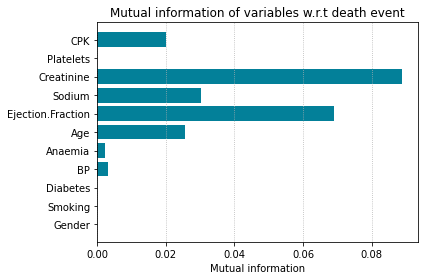

In [ ]:
from sklearn.feature_selection import mutual_info_classif

MI_features = ['Gender','Smoking','Diabetes','BP','Anaemia','Age','Ejection.Fraction','Sodium','Creatinine','Platelets','CPK']

mutual_infos = (mutual_info_classif(X=health[MI_features],
                                    y=health["Event"], 
                                    n_neighbors=20,
                                    discrete_features=[True,True,True,True,True,False,False,False,False,False,False ],
                                    random_state=42))

plt.figure(figsize=(6, 4))
plt.barh(y=MI_features, width=mutual_infos, color="#038099")
plt.title("Mutual information of variables w.r.t death event");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

Target variable majorly depends on Creatinine, Ejection fraction, sodium, Age and CPK levels.

**Predicion of death event**

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
X = health[['Age','Ejection.Fraction','Sodium','Creatinine','CPK']]
y = health[['Event']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print('Original dataset shape:\n', y_train.value_counts()) 

Original dataset shape:
 Event
0        162
1         77
dtype: int64


Highly imbalanced dataset and this can lead to biased predictions.  

**Oversampling**

In [ ]:
# Balancing the imbalanced dataset by using oversampling technique
from imblearn.over_sampling import SMOTE

sampling = SMOTE(random_state = 100) #Using SMOTE technique
X_train, y_train = sampling.fit_resample(X_train.values, y_train.values) 


# Shuffle the data
perms = np.random.permutation(X_train.shape[0]) 
X_train = X_train[perms]
y_train = y_train[perms]


# Converting it to a dataframe
X_train = pd.DataFrame(data = X_train)
y_train = pd.DataFrame(data = y_train)

header = ['Age','Ejection.Fraction','Sodium','Creatinine','CPK']
X_train.set_axis(header, axis=1, inplace=True)

print('dataset shape after SMOTE:\n',y_train.value_counts()) 


dataset shape after SMOTE:
 0    162
1    162
dtype: int64


**Implemeting a decision tree classifier** 

             feature  importance
0                Age       0.206
1  Ejection.Fraction       0.236
2             Sodium       0.063
3         Creatinine       0.307
4                CPK       0.187


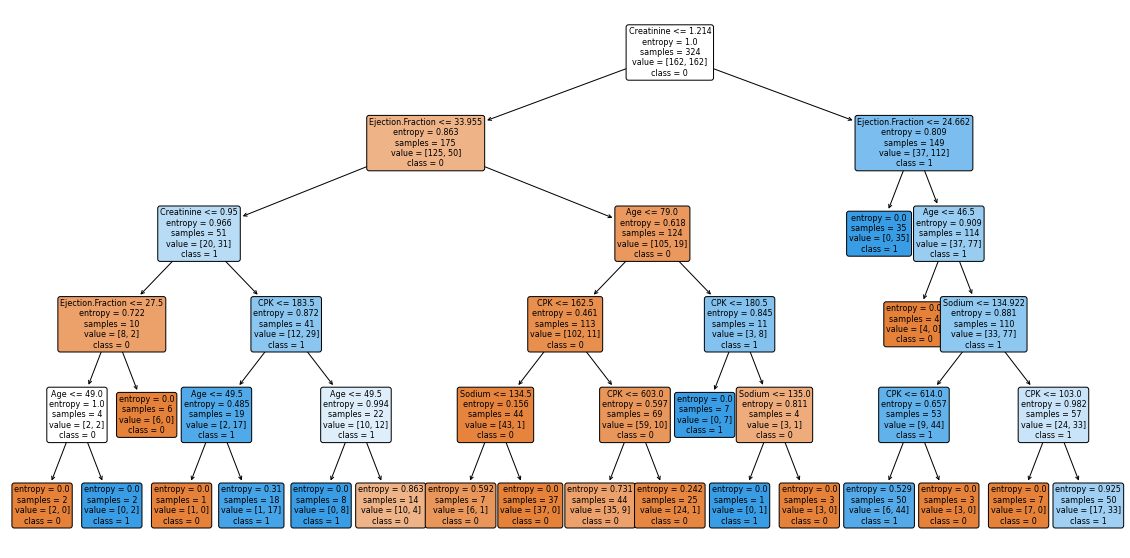

In [ ]:
#### Decision tree Classifier #######
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import plot_tree


from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state= 123)
clf =clf.fit(X_train,y_train)

class_names = ['0', '1']
feat_importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
clf.tree_.compute_feature_importances(normalize=False)
print(feat_importance)

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, feature_names = feat_importance['feature'], filled = True, rounded=True, class_names=class_names, fontsize = 8)


In [ ]:
from sklearn import metrics 

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.75


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  7]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.61      0.58      0.59        19

    accuracy                           0.75        60
   macro avg       0.71      0.70      0.71        60
weighted avg       0.75      0.75      0.75        60

